This wrap-up quiz uses the penguins dataset, but notice that we do not use the traditional Species column as predictive target:

In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

We therefore define our problem as a regression problem: we want to predict the body mass of a penguin given its culmen and flipper measurements.

Notice that we randomly shuffled the rows of the dataset after loading it (dataset.sample(frac=1, random_state=0)). The reason is to break a spurious order-related statistical dependency that would otherwise cause trouble with the naive cross-validation procedure we use in this notebook. The problem of order-dependent samples will be discussed in more detail on the model evaluation module and is outside of the scope of this quiz for now. Now, evaluate the following tree-based models:

    a decision tree regressor, i.e. sklearn.tree.DecisionTreeRegressor
    a random forest regressor, i.e. sklearn.ensemble.RandomForestRegressor

Use the default hyper-parameter settings for both models. The only exception is to pass random_state=0 for all models to be sure to recover the exact same performance scores as the solutions to this quiz.

Evaluate the generalization performance of these models using a 10-fold cross-validation:

    use sklearn.model_selection.cross_validate to run the cross-validation routine
    set the parameter cv=10 to use a 10-fold cross-validation strategy. Store the training score of the cross-validation by setting the parameter return_train_score=True in the function cross_validate as we will use it later on.

<h1>Question 1</h1> (1 point possible)

By comparing the cross-validation test scores fold-to-fold, count the number of times a random forest is better than a single decision tree. Select the range which this number belongs to:

a) [0, 3]: the random forest model is substantially worse than the single decision tree regressor
b) [4, 6]: both models are almost equivalent
c) [7, 10]: the random forest model is substantially better than the single decision tree regressor 

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

d_tree = DecisionTreeRegressor(random_state=0)
r_forest = RandomForestRegressor(random_state=0)
tree_cv = cross_validate(d_tree, data, target, cv=10, return_train_score=True, return_estimator=True)
forest_cv = cross_validate(r_forest, data, target, cv=10, return_train_score=True, return_estimator=True)

In [6]:
tree_cv['test_score'] < forest_cv['test_score']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [5]:
print(tree_cv['test_score'])
print(forest_cv['test_score'])

[0.59650558 0.66957713 0.7193112  0.8184209  0.6242818  0.72483157
 0.53090702 0.51655398 0.58421785 0.49038086]
[0.78812533 0.77436104 0.88871396 0.84661427 0.78043644 0.85771461
 0.79185662 0.73543268 0.76485281 0.8077531 ]


Now, train and evaluate with the same cross-validation strategy a random forest with 5 decision trees and another containing 100 decision trees. Once again store the training score.
<h1>Question 2</h1> (1 point possible)

By comparing the cross-validation test scores fold-to-fold, count the number of times a random forest with 100 decision trees is better than a random forest with 5 decision trees. Select the range which this number belongs to:
a) [0, 3]: the random forest model with 100 decision trees is substantially worse than the random forest model with 5 decision trees
b) [4, 6]: both models are almost equivalent
c) [7, 10]: the random forest model with 100 decision trees is substantially better than the random forest model with 5 decision trees 

In [11]:
r_forest100 = RandomForestRegressor(n_estimators=100, random_state=0)
r_forest5 = RandomForestRegressor(n_estimators=5, random_state=0)
forest100_cv = cross_validate(r_forest100, data, target, cv=10, return_train_score=True, return_estimator=True)
forest5_cv = cross_validate(r_forest5, data, target, cv=10, return_train_score=True, return_estimator=True)

In [12]:
forest100_cv['test_score'] > forest5_cv['test_score']

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])



Plot the validation curve of the n_estimators parameters defined by:

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

<h1>Question 3</h1> (1 point possible)

Select the correct statements below.
a) the train score decreases when n_estimators become large (above 500 trees)
b) the train score reaches a plateau when n_estimators become large (above 500 trees)
c) the train score increases when n_estimators become large (above 500 trees)
d) the test score decreases when n_estimators become large (above 500 trees)
e) the test score reaches a plateau when n_estimators become large (above 500 trees)
f) the test score increases when n_estimators become large (above 500 trees) 

In [22]:
from sklearn.model_selection import validation_curve

forest_plain = RandomForestRegressor(random_state=0)

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
forest_train, forest_test = validation_curve(forest_plain, data, target, param_name='n_estimators', param_range=n_estimators, n_jobs=2)

In [24]:
import pandas as pd
pd.DataFrame(forest_train.mean(axis=1), n_estimators)

,0
1,0.861528
2,0.912372
5,0.950560
10,0.961408
20,0.967479
50,0.972061
100,0.972397
200,0.972818
500,0.973158
1000,0.973191


In [25]:
pd.DataFrame(forest_test.mean(axis=1), n_estimators)

,0
1,0.632427
2,0.715735
5,0.761288
10,0.774916
20,0.787109
50,0.796847
100,0.796528
200,0.799116
500,0.798490
1000,0.799624


In [19]:
forest_train.mean(axis=1)

array([0.86152823, 0.91237165, 0.95056033, 0.96140771, 0.96747911,
       0.97206105, 0.97239677, 0.97281778, 0.9731584 , 0.9731906 ])



Repeat the previous experiment but this time, instead of choosing the default parameters for the random forest, set the parameter max_depth=5 and build the validation curve.
<h1>Question 4</h1> (1 point possible)

Comparing the validation curve (train and test scores) of the random forest with a full depth and the random forest with a limited depth, select the correct statements.
a) the test score of the random forest with a full depth is (almost) always better than the test score of the random forest with a limited depth
b) the train score of the random forest with a full depth is (almost) always better than the train score of the random forest with a limited depth
c) the gap between the train and test scores decreases when reducing the depth of the trees of the random forest
d) the gap between the train and test scores increases when reducing the depth of the trees of the random forest 

In [26]:
forest_plain2 = RandomForestRegressor(max_depth=5, random_state=0)

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
forest_train2, forest_test2 = validation_curve(forest_plain2, data, target, param_name='n_estimators', param_range=n_estimators, n_jobs=2)

In [34]:
pd.DataFrame({"Training 2": forest_train2.mean(axis=1),  "Testing 2": forest_test2.mean(axis=1), "Training 1": forest_train.mean(axis=1), "Testing 1": forest_test.mean(axis=1)}, n_estimators)

,Training 2,Testing 2,Training 1,Testing 1
1,0.847475,0.734790,0.861528,0.632427
2,0.870527,0.761275,0.912372,0.715735
5,0.895309,0.781236,0.950560,0.761288
10,0.902120,0.793510,0.961408,0.774916
20,0.905576,0.798741,0.967479,0.787109
50,0.907722,0.804334,0.972061,0.796847
100,0.908297,0.807105,0.972397,0.796528
200,0.908211,0.809453,0.972818,0.799116
500,0.908290,0.809350,0.973158,0.798490
1000,0.908550,0.810312,0.973191,0.799624


In [30]:
forest_test > forest_test2

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True, False, False, False]])

In [31]:
forest_train > forest_train2

array([[ True,  True, False,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [35]:
pd.DataFrame({"Shallow": forest_train2.mean(axis=1) - forest_test2.mean(axis=1), "Deep": forest_train.mean(axis=1) - forest_test.mean(axis=1)}, n_estimators)

,Shallow,Deep
1,0.112685,0.229101
2,0.109252,0.196637
5,0.114073,0.189272
10,0.108609,0.186491
20,0.106835,0.180370
50,0.103388,0.175214
100,0.101192,0.175869
200,0.098757,0.173702
500,0.098940,0.174668
1000,0.098238,0.173567


In [38]:
print("Shallow vs. Deep: ")
(forest_train2.mean(axis=1) - forest_test2.mean(axis=1)) < (forest_train.mean(axis=1) - forest_test.mean(axis=1))

Shallow vs. Deep: 


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Let us now focus at the very beginning of the validation curves, and consider the training score of a random forests with a single tree while using the default max_depth=None parameter setting:

In [39]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

should return:

In [42]:
import numpy as np
should_return = np.array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [44]:
cv_results_tree["train_score"] - should_return

array([ 3.58898566e-09,  4.49875237e-09,  1.25440780e-09, -1.33048850e-09,
       -1.84455973e-09,  3.25138927e-09, -2.63632782e-10,  4.30029079e-09,
        1.53893343e-10,  1.06499920e-09])

The fact that this single-tree Random Forest can never reach a perfect R2 score of 1.0 on the training can be surprising.

Indeed, if you we evaluate the training accuracy of the single DecisionTreeRegressor one gets perfect memorization of the training data:

In [45]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Question 5
(1/1 point)

From the following statements, select the one that explains that a single-tree random forest cannot achieve perfect training scores.
a) the single tree in the random forest is trained using a bootstrap of the training set and not the training set itself (because bootstrap=True by default) a) the single tree in the random forest is trained using a bootstrap of the training set and not the training set itself (because bootstrap=True by default) - correct
b) for a given feature, the single tree in the random forest uses random splits while the single decision tree uses the best split
c) the random forest automatically limits the depth of the single decision tree, which prevents overfitting 



Build a validation curve for a sklearn.ensemble.HistGradientBoostingRegressor varying max_iter as follows:

max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

We recall that max_iter corresponds to the number of trees in the boosted model.

Plot the average train and test score for each value of max_iter.
<h1>Question 6</h1> (1 point possible)

Select the correct statements.
a) for a small number of trees (between 5 and 10 trees), the gradient boosting model behave like the random forest algorithm: the train scores are high while the test scores are not optimum
b) for a small number of trees (between 5 and 10 trees), the gradient boosting model behave differently to the random forest algorithm: both the train and test scores are small
c) with a large number of trees (> 100 trees) adding more trees in the ensemble causes the gradient boosting model overfit (increasing the gap between the train score and test score)
d) with a large number of trees (> 100 trees) adding more trees in the ensemble does not impact the generalization performance of the gradient boosting model 

In [53]:
from sklearn.ensemble import HistGradientBoostingRegressor

max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]
# max_iter = [1, 2, 5, 10, 20, 50]

hist_grad = HistGradientBoostingRegressor(random_state=0)
hgbr_train, hgbr_test = validation_curve(hist_grad, data, target, param_name='max_iter', param_range=max_iter, n_jobs=2)

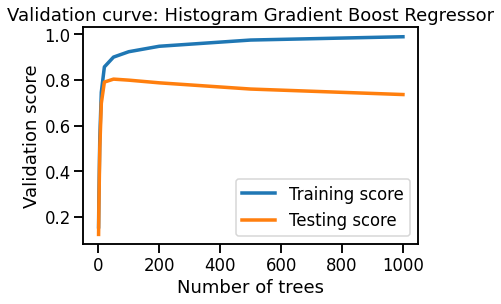

In [54]:
hg_train_mean = hgbr_train.mean(axis=1)
hg_test_mean = hgbr_test.mean(axis=1)

import matplotlib.pyplot as plt

plt.plot(max_iter, hg_train_mean, label="Training score")
plt.plot(max_iter, hg_test_mean, label="Testing score")

plt.legend()

plt.xlabel("Number of trees")
plt.ylabel("Validation score")
_ = plt.title("Validation curve: Histogram Gradient Boost Regressor")